In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")

In [6]:
pointings = pd.read_csv("iDR4_pointings.csv")

In [21]:
field = pointings["Field"]
ra = pointings["RA"]
dec = pointings["DEC"]

### Defining the region of Hydra-Centaurus Supercluster <br>
For this first moment, I will use approximately the region defined by L.N. da Costa et al. 1986 to select the pointings for the Hydra-Centaurus Supercluster. The region is defined by <br>

$$
140º < R.A. < 225º  \\
-15º < Dec. < -50
$$

In [5]:
from astropy import units as u
from astropy.coordinates import Angle

ra_1 = Angle(140, u.degree)
ra_2 = Angle(185, u.degree) #I chose 185 because there is not S-PLUS data beyond that for Hydra-Centaurus
dec_1 = Angle(-50, u.degree)
dec_2 = Angle(-15, u.degree)

print("{:.5f} <= R.A. <= {:.5f}".format(ra_1.hour, ra_2.hour))
print("{} <= DEC. <= {}".format(dec_1.dms, dec_2.dms))

9.33333 <= R.A. <= 12.33333
dms_tuple(d=-50.0, m=-0.0, s=-0.0) <= DEC. <= dms_tuple(d=-15.0, m=-0.0, s=-0.0)


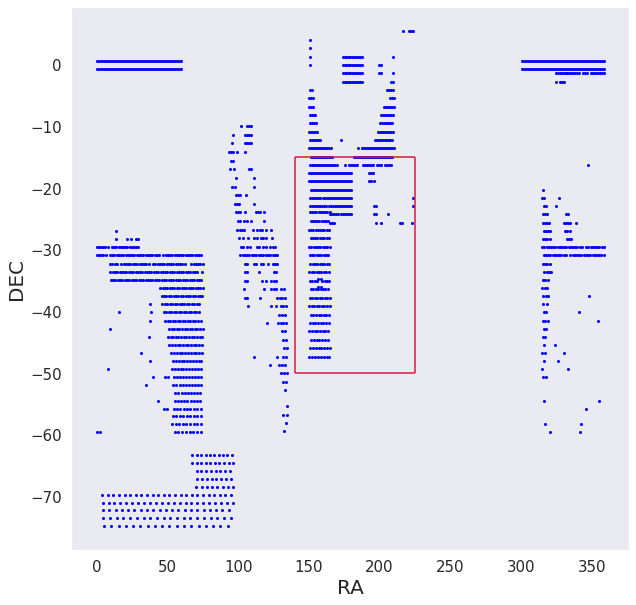

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(ra, dec, color="blue", s=4.0)
ax.set_xlabel("RA", fontsize=20)
ax.set_ylabel("DEC", fontsize=20)
ax.xaxis.set_tick_params(labelsize=15, width=3)
ax.yaxis.set_tick_params(labelsize=15, width=3)

ax.vlines(x=140, ymin=-50, ymax=-15, linestyle='-', color="crimson")
ax.vlines(x=225, ymin=-50, ymax=-15, linestyle='-', color="crimson")
ax.hlines(y=-50, xmin=140, xmax=225, linestyle='-', color="crimson")
ax.hlines(y=-15, xmin=140, xmax=225, linestyle='-', color="crimson")

In [18]:
mask = (ra < 225) & (ra > 140) & (dec < -15) & (dec > -50)

In [ ]:
field[mask].to_csv("Fields_HC.csv", index=False)

### Selecting fields for Hydra

In [6]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances = dist(ra, dec)

In [9]:
mask_hydra = distances < 6.0*radius

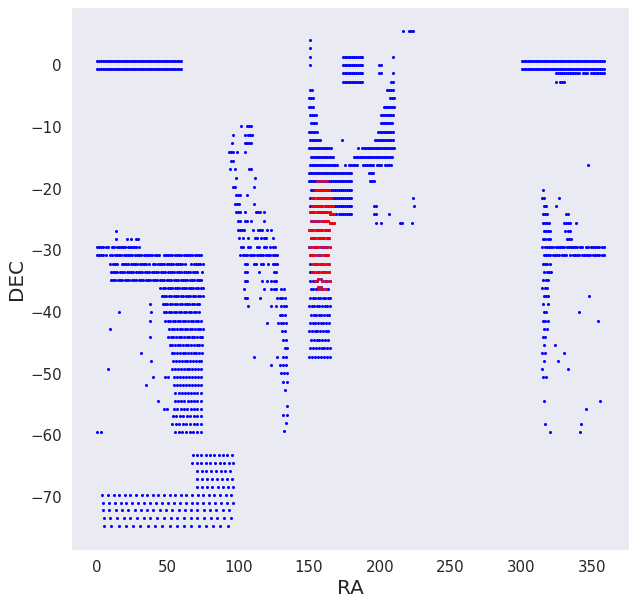

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(ra, dec, color="blue", s=4.0)
ax.set_xlabel("RA", fontsize=20)
ax.set_ylabel("DEC", fontsize=20)
ax.xaxis.set_tick_params(labelsize=15, width=3)
ax.yaxis.set_tick_params(labelsize=15, width=3)

ax.scatter(ra[mask_hydra], dec[mask_hydra], color="red", s=3.0)

In [13]:
field[mask_hydra].to_csv("../Hydra-analysis/fields_hydra.csv", index=False)

### Let's see if the data we have for Hydra-Centaurus in S-PLUS iDR4 covers 5R200 of the main clusters in the region
I will have to collect the names and location (RA x DEC) and R200's of the main clusters in Hydra-Centaurus, then I define a radius of 5º around each one to define the region that still needs to be observed

In [5]:
cl_names = ["N3393", "A1060", "N3054", "N3087", "Antlia", "N3347", "N3250", "N3256", "N3263"]

cl_ras = [162.09, 159.17, 148.61, 149.78, 157.51, 160.69, 156.63, 156.96, 157.30]

cl_decs = [-25.16, -27.52, -25.70, -34.22, -35.32, -36.35, -39.94, -43.90, -44.12]

In [16]:
mask_hc = (ra < 185) & (ra > 140) & (dec < -15) & (dec > -50)

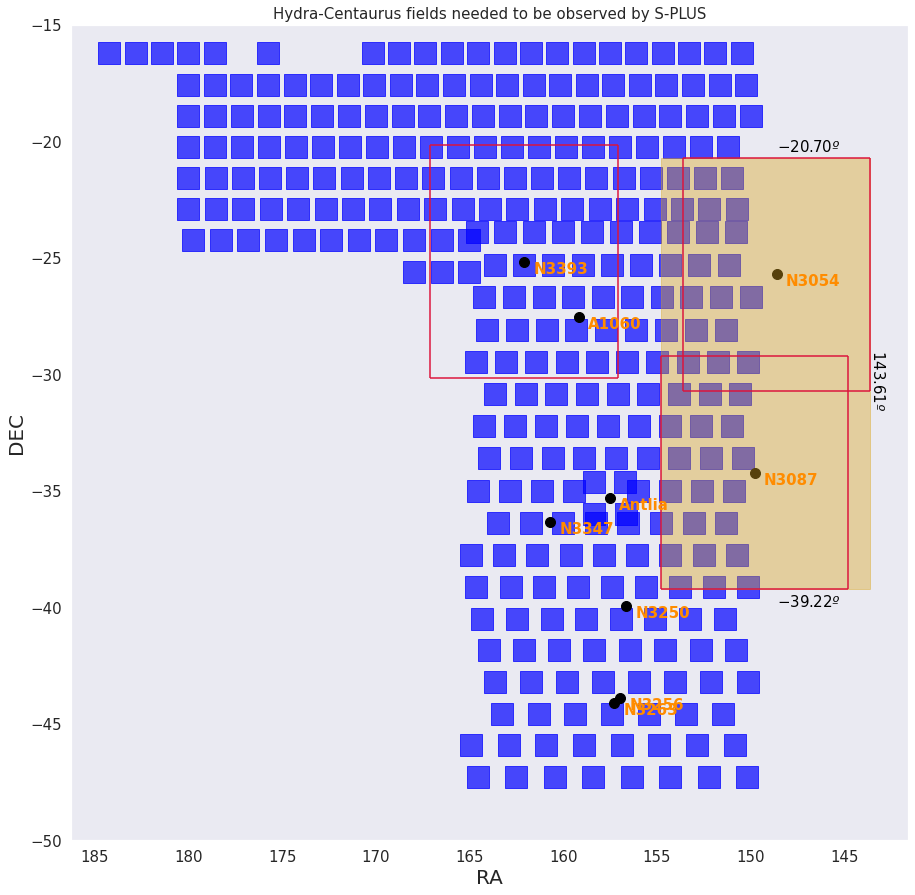

In [96]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_xlabel("RA", fontsize=20)
ax.set_ylabel("DEC", fontsize=20)
ax.xaxis.set_tick_params(labelsize=15, width=3)
ax.yaxis.set_tick_params(labelsize=15, width=3)
ax.set_title("Hydra-Centaurus fields needed to be observed by S-PLUS", fontsize=15)

ax.scatter(ra[mask_hc], dec[mask_hc], color="blue", s=500, marker='s', alpha=0.7)

dx = 0.5
for ra_i, dec_i, text in zip(cl_ras, cl_decs, cl_names):
    ax.scatter(ra_i, dec_i, marker='o', s = 100, color="black")
    ax.text(ra_i-dx, dec_i-dx, s=text, fontsize=15, fontweight='bold', color='darkorange')

#Draw squares which sides are 5º away from the central point (each of the more removed clusters)    
for ra_j, dec_j in zip([ra_3054, ra_3087, ra_3393], [dec_3054, dec_3087, dec_3393]):    
    ax.vlines(x=ra_j-5, ymin=dec_j-5, ymax=dec_j+5, linestyle='-', color="crimson")
    ax.vlines(x=ra_j+5, ymin=dec_j-5, ymax=dec_j+5, linestyle='-', color="crimson")
    ax.hlines(y=dec_j-5, xmin=ra_j-5, xmax=ra_j+5, linestyle='-', color="crimson")
    ax.hlines(y=dec_j+5, xmin=ra_j-5, xmax=ra_j+5, linestyle='-', color="crimson")

#I have to define ymax and ymin in terms of a fraction of the y axis    
ax.set_ylim(ymin=-50, ymax=-15)
y_range = abs(-50 - (-15))
ymax = ((dec_3054 + 5 + 50) / y_range) 
ymin = ((dec_3087 - 5 + 50) / y_range) 
    
ax.axvspan(xmin=ra_3054-5, xmax=ra_3087+5, ymax=ymax, ymin=ymin, alpha=0.4, color="goldenrod")

ax.text(ra_3054, dec_3054+5+0.5*dx, s=r"${:.2f}º$".format(dec_3054+5), fontsize=15, color='black')
ax.text(ra_3054, dec_3087-5-1.5*dx, s=r"${:.2f}º$".format(dec_3087-5), fontsize=15, color='black')
ax.text(ra_3054-5, dec_3054-5-1.5*dx, s=r"${:.2f}º$".format(ra_3054-5), fontsize=15, color='black', rotation=270)
    
ax.invert_xaxis()

In [42]:
i_3054 = np.argwhere(np.asarray(cl_names) == "N3054")[0][0]
ra_3054 = cl_ras[i_3054]
dec_3054 = cl_decs[i_3054]

i_3087 = np.argwhere(np.asarray(cl_names) == "N3087")[0][0]
ra_3087 = cl_ras[i_3087]
dec_3087 = cl_decs[i_3087]

i_3393 = np.argwhere(np.asarray(cl_names) == "N3393")[0][0]
ra_3393 = cl_ras[i_3393]
dec_3393 = cl_decs[i_3393]